# **Project Name - Brain Tumor MRI Image Classification**

## **Project Type**- Classification

## **Contribution** - Individual

## **Name** - Janani Ravi

# **Project Summary** 

# **GitHub Link** - [Click here](https://github.com/Jan2309jr/Brain-Tumor-MRI-Image-Classification.git)

# **Problem Statement**

This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.

# **Understanding my Dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/_classes.csv
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0161_jpg.rf.9595624d4c3f9d8a33cf3c886be7d369.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0501_jpg.rf.0856fb4f2ec41cc13d2a852ee73d0097.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0396_jpg.rf.e47ecb1bd123384104cf24389da7152b.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0604_jpg.rf.81ab948f941bd95a4e948a6fe8ee8b91.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0433_jpg.rf.24f5708aee10d051bb80fa981e806cc3.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0490_jpg.rf.db7294a768cc96df556cfdd5229da795.jpg
/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset/valid/pituitary/Tr-pi_0448_jpg.rf.58bc8c0c68ddafab07875d740879e86b.jpg
/kaggle/input/brain-

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

## Loading the dataset

In [3]:
#setting paths
base_path="/kaggle/input/brain-tumor-trainingset/Brain-Tumor-Dataset"
train_path=os.path.join(base_path,"train")
test_path=os.path.join(base_path,"test")
valid_path=os.path.join(base_path,"valid")

## Number of categories(tumor types)

In [4]:
def categories(data_path):
    categories = []
    for i in os.listdir(data_path):
        if(os.path.isdir(os.path.join(data_path,i))):
            categories.append(i)
    return categories
print("Brain Tumor Dataset")
print(categories(base_path))
print("Train folder")
print(categories(train_path))

Brain Tumor Dataset
['valid', 'test', 'train']
Train folder
['pituitary', 'no_tumor', 'meningioma', 'glioma']


## First View of dataset

Training set image samples

 pituitary


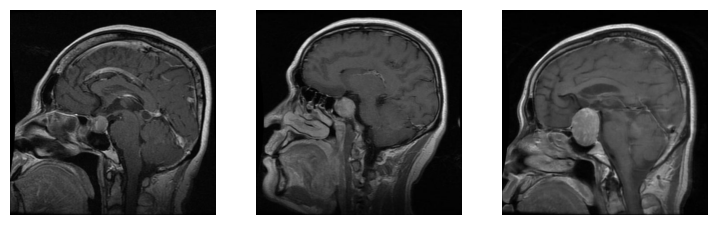


 no_tumor


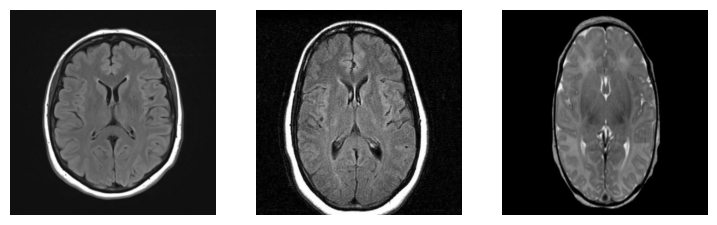


 meningioma


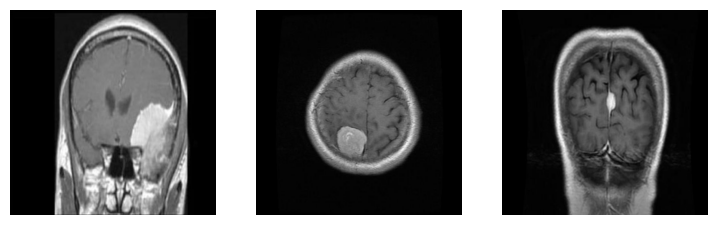


 glioma


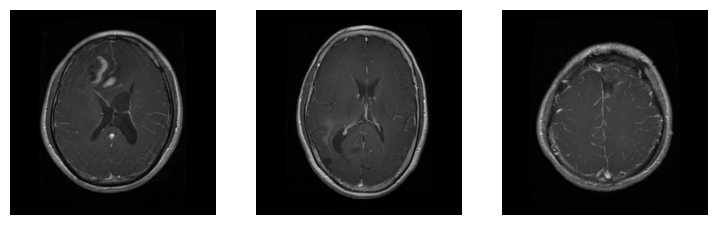

In [5]:
def show_sample_images(data_path,n=3):
    for i in os.listdir(data_path):
        cat_path=os.path.join(data_path,i)
        if(os.path.isdir(cat_path)):
            images=os.listdir(cat_path)[:3]
            plt.figure(figsize=(n*3,3))
            print("\n",i)
            for k,j in enumerate(images):
                img=Image.open(os.path.join(cat_path,j))
                plt.subplot(1,n,k+1)
                plt.imshow(img)
                plt.axis('off')
            plt.show()
print("Training set image samples")
show_sample_images(train_path)

## Dataset count in each category

In [6]:
def count_dataset(data_path):
    print(f"The dataset has {len(os.listdir(data_path))} folders: {os.listdir(data_path)} \n")
    print("-----------")
    for i in os.listdir(data_path):
        count_cat=0;
        print(f"{i} folder :-")
        if(os.path.isdir(os.path.join(data_path,i))):
            for j in os.listdir(os.path.join(data_path,i)):
                if(os.path.isdir(os.path.join(data_path,i,j))):
                    count_cat+=1
                    print(f"{j} : {len(os.listdir(os.path.join(data_path,i,j)))}")
        print("-----------")
        

count_dataset(base_path)

The dataset has 3 folders: ['valid', 'test', 'train'] 

-----------
valid folder :-
pituitary : 118
no_tumor : 99
meningioma : 124
glioma : 161
-----------
test folder :-
pituitary : 54
no_tumor : 49
meningioma : 63
glioma : 80
-----------
train folder :-
pituitary : 438
no_tumor : 335
meningioma : 358
glioma : 564
-----------


## Checking class imbalance visually

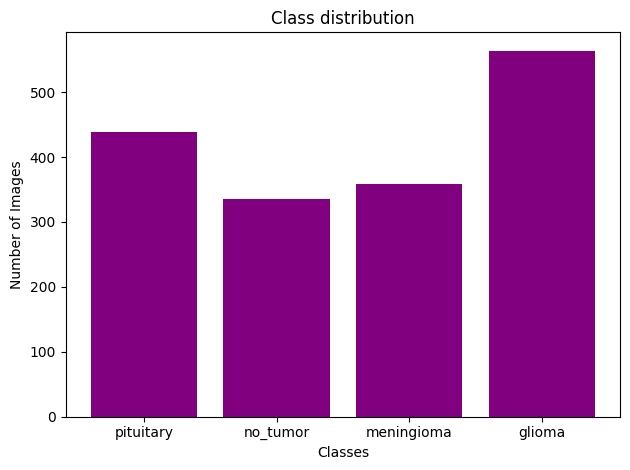

In [7]:
def check_class_distribution(data_path):
    plt.title("Class distribution")
    class_count={}
    for i in os.listdir(data_path):
        class_path=os.path.join(data_path,i)
        if(os.path.isdir(os.path.join(data_path,i))):
            for j in os.listdir(os.path.join(data_path,i)):
                class_count[i]=len(os.listdir(class_path))
    plt.bar(class_count.keys(),class_count.values(),color="purple")
    plt.ylabel("Number of Images")
    plt.xlabel("Classes")
    plt.tight_layout()
    plt.show()
check_class_distribution(train_path)

## Image resolution consistency


📏 Unique Image Resolutions:
Resolution (640, 640): 1695 images


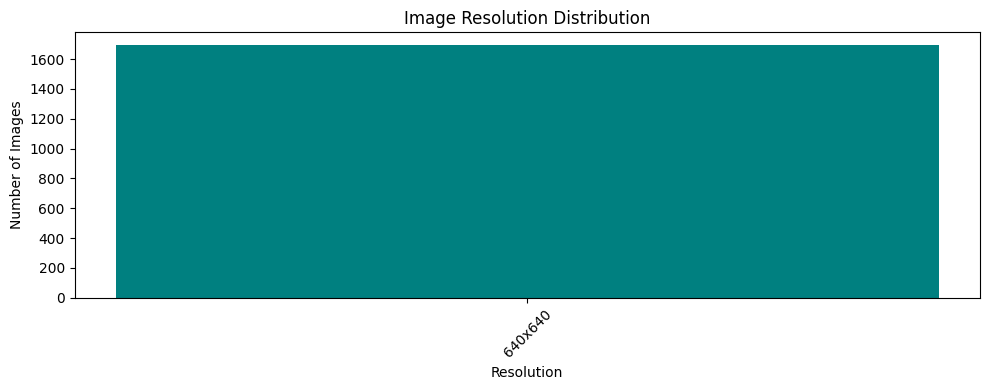

In [8]:
def check_image_resolutions(data_path):
    resolution_count = defaultdict(int)

    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if not os.path.isdir(class_path): continue

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            try:
                with Image.open(image_path) as img:
                    resolution_count[img.size] += 1  # (width, height)
            except Exception as e:
                print(f"Error loading {image_path}: {e}")

    # Print unique resolutions
    print("\n📏 Unique Image Resolutions:")
    for res, count in sorted(resolution_count.items(), key=lambda x: -x[1]):
        print(f"Resolution {res}: {count} images")

    # Plot resolution frequency
    if resolution_count:
        labels = [f"{w}x{h}" for (w, h) in resolution_count.keys()]
        values = list(resolution_count.values())

        plt.figure(figsize=(10, 4))
        plt.bar(labels, values, color='teal')
        plt.title("Image Resolution Distribution")
        plt.xlabel("Resolution")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage:
check_image_resolutions(train_path)

# Exploratory Data Analysis